In [104]:
import pandas as pd

# Load dataset
df = pd.read_csv("data/Social_Media_Advertising.csv")

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Clean Acquisition_Cost (remove $ and convert to float)
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

# Clean Duration (extract number of days)
df['Duration_days'] = df['Duration'].str.extract('(\d+)').astype(float)

# Quick overview
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       300000 non-null  int64         
 1   Target_Audience   300000 non-null  object        
 2   Campaign_Goal     300000 non-null  object        
 3   Duration          300000 non-null  object        
 4   Channel_Used      300000 non-null  object        
 5   Conversion_Rate   300000 non-null  float64       
 6   Acquisition_Cost  300000 non-null  float64       
 7   ROI               300000 non-null  float64       
 8   Location          300000 non-null  object        
 9   Language          300000 non-null  object        
 10  Clicks            300000 non-null  int64         
 11  Impressions       300000 non-null  int64         
 12  Engagement_Score  300000 non-null  int64         
 13  Customer_Segment  300000 non-null  object        
 14  Date

Purpose:

Check datatypes after cleaning.

Spot missing values and distribution of numeric features.

In [105]:
display(df)

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,Duration_days
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,500.0,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align,15.0
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,500.0,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony,15.0
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,500.0,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit,15.0
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,500.0,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish,15.0
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,500.0,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,565525,Men 25-34,Market Expansion,60 Days,Instagram,0.14,15000.0,4.950000,Los Angeles,English,39999,119998,7,Technology,2022-10-17,Code Crafters,60.0
299996,539680,Women 25-34,Market Expansion,60 Days,Instagram,0.08,15000.0,3.410000,Austin,Spanish,39999,119998,8,Technology,2022-02-25,Innovate Infinity,60.0
299997,140032,Women 35-44,Brand Awareness,60 Days,Pinterest,0.09,15000.0,0.904461,Miami,French,23492,77476,1,Food,2022-10-02,Gastronomy Guild,60.0
299998,161067,Women 18-24,Market Expansion,60 Days,Instagram,0.13,15000.0,7.430000,Las Vegas,Spanish,39999,119999,10,Food,2022-01-24,Savor Street,60.0


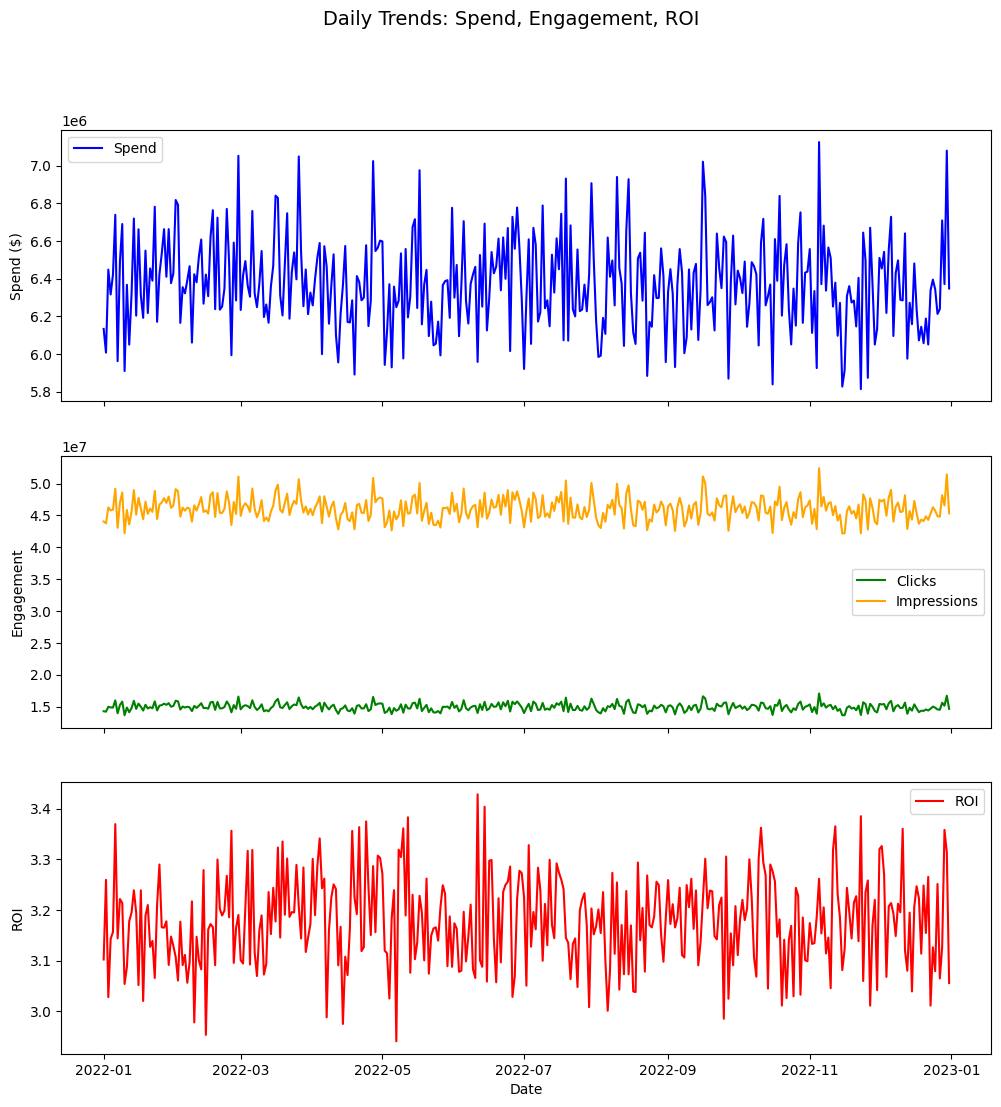

In [106]:
import matplotlib.pyplot as plt

# Aggregate by Date
daily = df.groupby('Date').agg({
    'Acquisition_Cost':'sum',
    'ROI':'mean',
    'Clicks':'sum',
    'Impressions':'sum',
    'Engagement_Score':'sum'
}).reset_index()

# Plot trends
fig, axs = plt.subplots(3, 1, figsize=(12,12), sharex=True)

axs[0].plot(daily['Date'], daily['Acquisition_Cost'], label="Spend", color="blue")
axs[0].set_ylabel("Spend ($)")
axs[0].legend()

axs[1].plot(daily['Date'], daily['Clicks'], label="Clicks", color="green")
axs[1].plot(daily['Date'], daily['Impressions'], label="Impressions", color="orange")
axs[1].set_ylabel("Engagement")
axs[1].legend()

axs[2].plot(daily['Date'], daily['ROI'], label="ROI", color="red")
axs[2].set_ylabel("ROI")
axs[2].legend()

plt.xlabel("Date")
plt.suptitle("Daily Trends: Spend, Engagement, ROI", fontsize=14)
plt.show()

### Purpose:
See if campaigns have seasonal spikes and how spend vs ROI behaves over time.

### Insights:
Daily spend remains consistently high (~6M–7M).

Impressions are fairly stable across the year.

ROI fluctuates significantly -> indicating campaigns vary in effectiveness even though spend is steady.
Insight: The company is spending consistently, but ROI depends heavily on what campaign is running, not just budget.

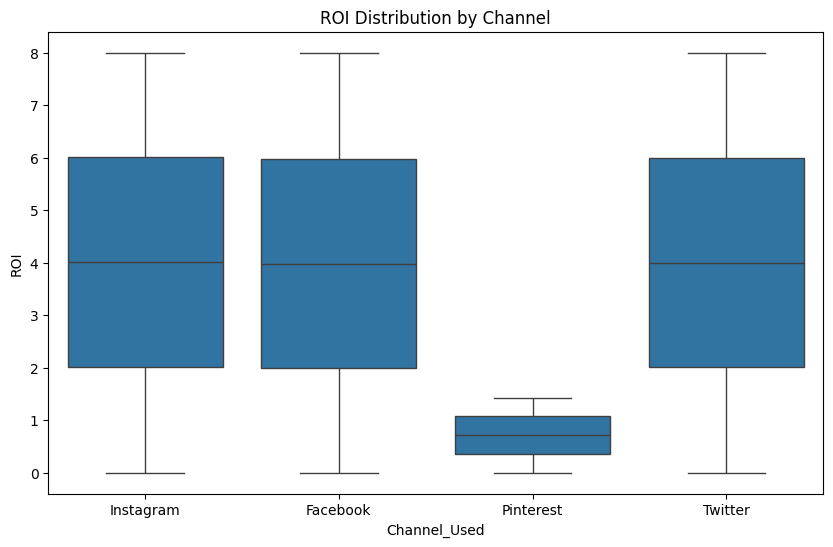

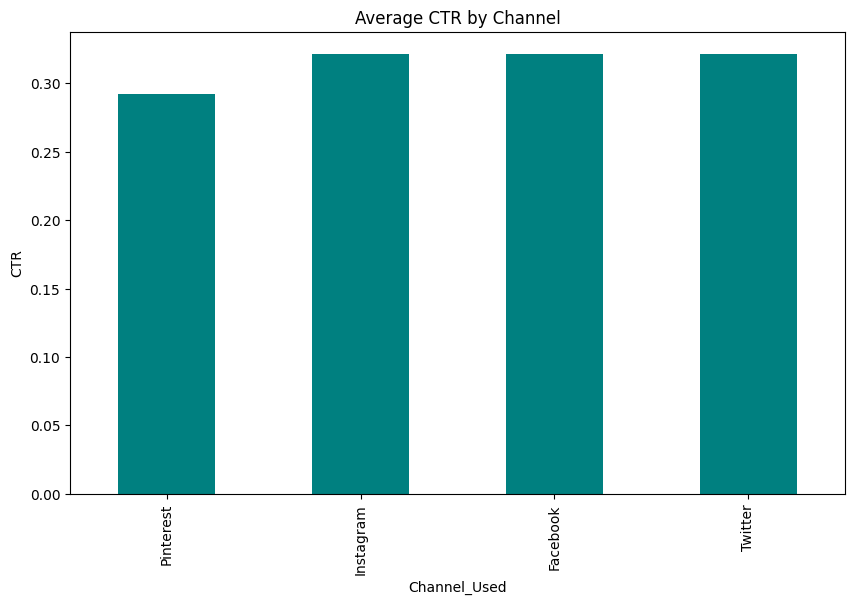

In [107]:
import seaborn as sns

# ROI by Channel
plt.figure(figsize=(10,6))
sns.boxplot(x="Channel_Used", y="ROI", data=df)
plt.title("ROI Distribution by Channel")
plt.show()

# CTR by Channel
df['CTR'] = df['Clicks'] / df['Impressions']
ctr_channel = df.groupby('Channel_Used')['CTR'].mean().sort_values()

plt.figure(figsize=(10,6))
ctr_channel.plot(kind='bar', color='teal')
plt.title("Average CTR by Channel")
plt.ylabel("CTR")
plt.show()


### Purpose:
Identify best-performing platforms (ROI, CTR).

### Insights:
ROI Distribution:

Instagram, Facebook, and Twitter have wide ROI ranges (0 -> 8).

Pinterest is consistently low ROI (mostly < 1.5).
Insight: Pinterest underperforms. Instagram/Facebook/Twitter are high potential but also high-risk (more variability).

CTR (Click-through Rate):

Twitter, Instagram, Facebook all around ~0.32.

Pinterest is lower (~0.29).
Insight: People engage more on Twitter/Instagram/Facebook -> stronger targeting.

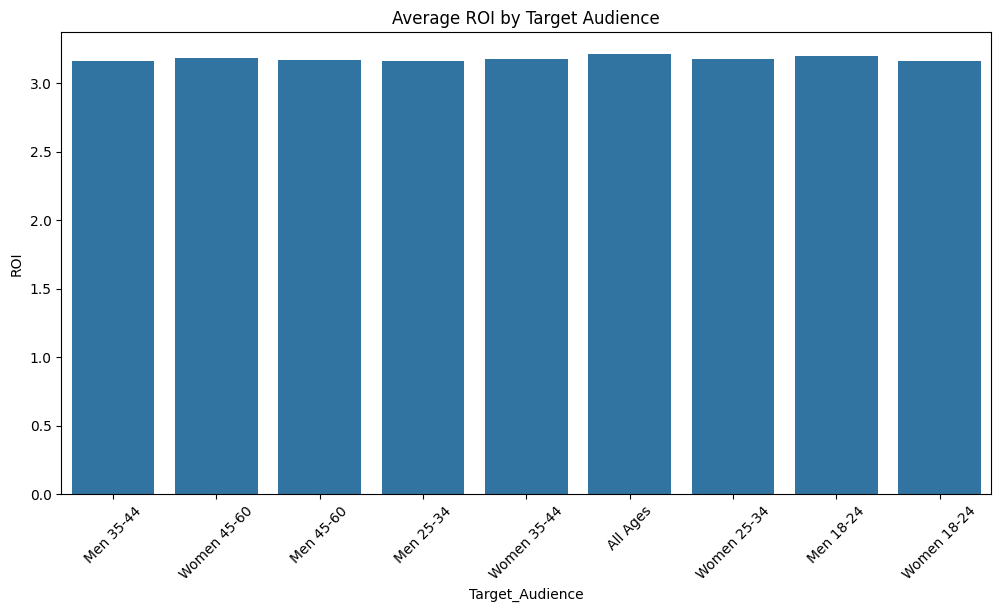

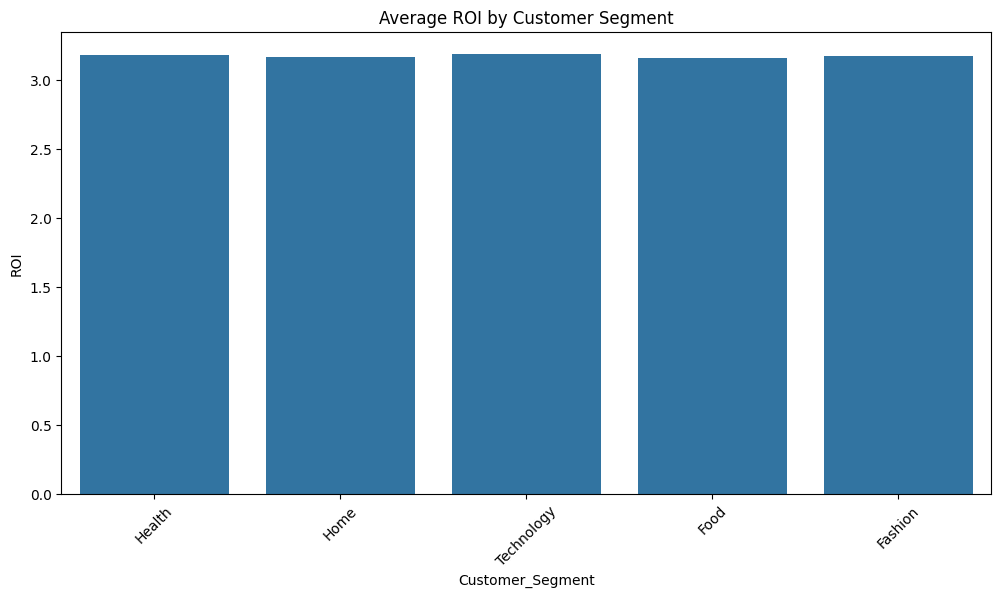

In [108]:
# ROI by Audience
plt.figure(figsize=(12,6))
sns.barplot(x="Target_Audience", y="ROI", data=df, estimator="mean", errorbar=None)
plt.title("Average ROI by Target Audience")
plt.xticks(rotation=45)
plt.show()

# ROI by Customer Segment
plt.figure(figsize=(12,6))
sns.barplot(x="Customer_Segment", y="ROI", data=df, estimator="mean", errorbar=None)
plt.title("Average ROI by Customer Segment")
plt.xticks(rotation=45)
plt.show()


### Insights:
ROI is uniform across audience groups (Men/Women, all age ranges).
Insight: Target audience segmentation (age/gender) doesn’t strongly impact ROI in this dataset. Campaign creative & channel choice might matter more.

ROI is almost the same across Health, Home, Technology, Food, Fashion.
Insight: Industry/segment isn’t a big differentiator in ROI. Need to focus more on channels & engagement.

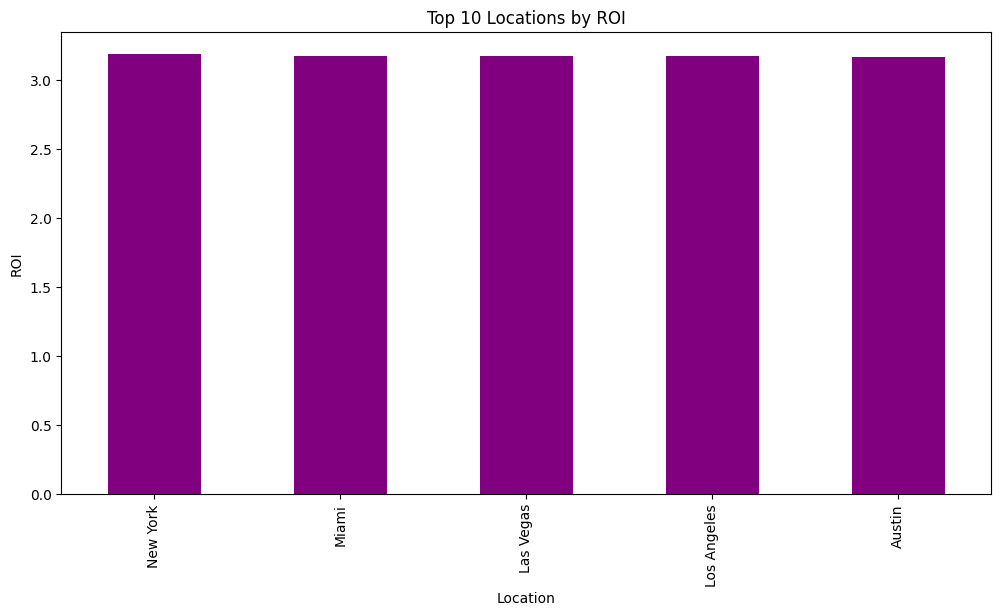

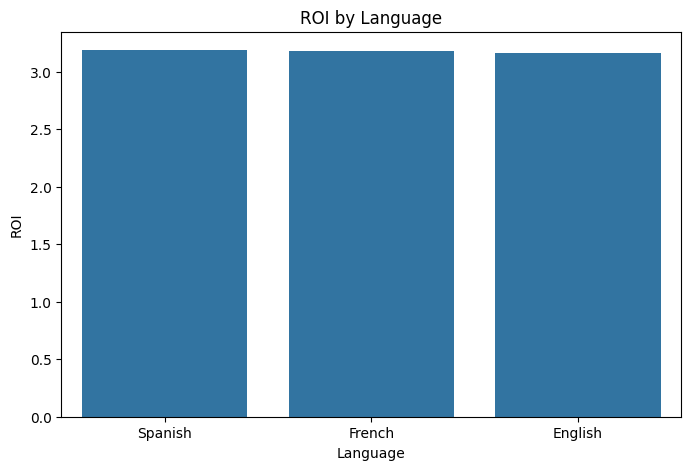

In [109]:
# Top 10 Locations by ROI
top_locations = df.groupby('Location')['ROI'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_locations.plot(kind='bar', color='purple')
plt.title("Top 10 Locations by ROI")
plt.ylabel("ROI")
plt.show()

# ROI by Language
plt.figure(figsize=(8,5))
sns.barplot(x="Language", y="ROI", data=df, estimator="mean", errorbar=None)
plt.title("ROI by Language")
plt.show()


### Purpose:
Regional & language-based campaign effectiveness.

### Insights
ROI looks stable across locations (NY, Miami, Vegas, LA, Austin) and languages (English, French, Spanish).
Regional/language targeting didn’t drastically change ROI. Future optimization might not require over-segmentation by city/language.

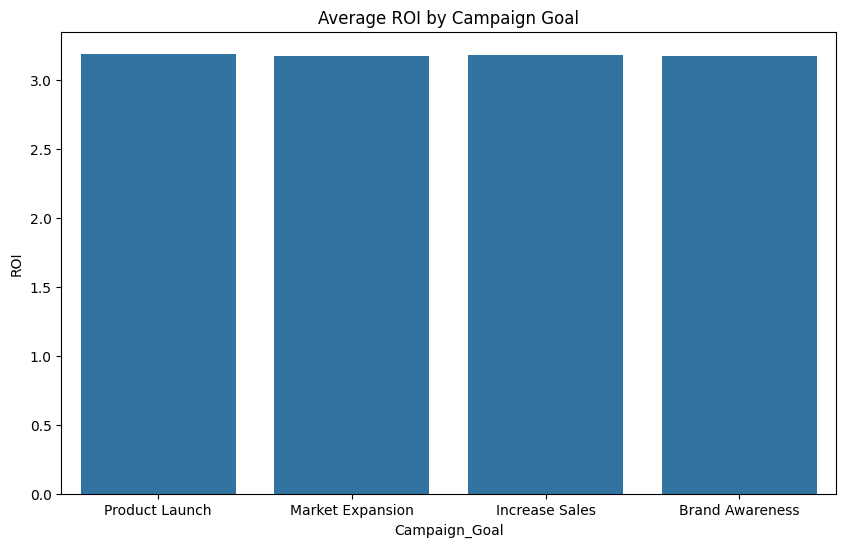

In [110]:
plt.figure(figsize=(10,6))
sns.barplot(x="Campaign_Goal", y="ROI", data=df, estimator="mean", errorbar=None)
plt.title("Average ROI by Campaign Goal")
plt.show()


### Purpose:
See which goals (Product Launch, Market Expansion, etc.) succeed more.

### Insights:
ROI for Product Launch, Market Expansion, Increase Sales, Brand Awareness are nearly identical.
Campaign goals by themselves don’t drive ROI difference. Execution (channel + creative) is more important.

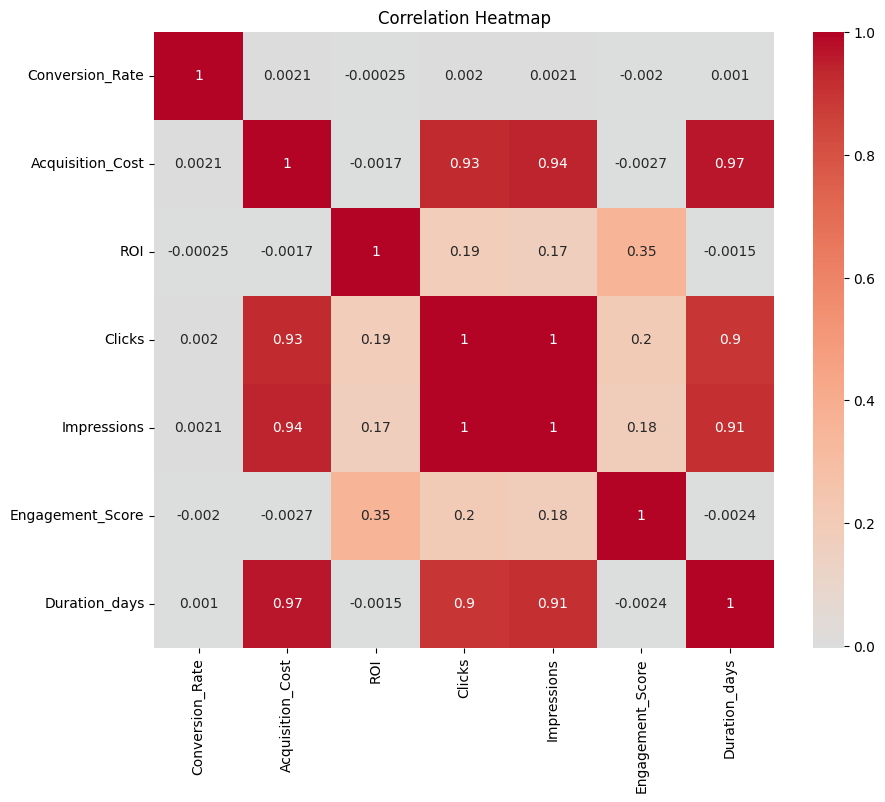

In [111]:
# Select numerical features
num_cols = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'Duration_days']
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


### Purpose:
Identify which metrics (Clicks, Impressions, Engagement) drive ROI most strongly.

### Insights:
Clicks, Impressions, Acquisition Cost, Duration_days are very highly correlated (0.9+).
This suggests that longer campaigns naturally cost more and bring more impressions/clicks.

ROI correlation is weak with most features, except Engagement_Score (0.35).
Insight: ROI is not just about spending more or reaching more people; quality of engagement matters.

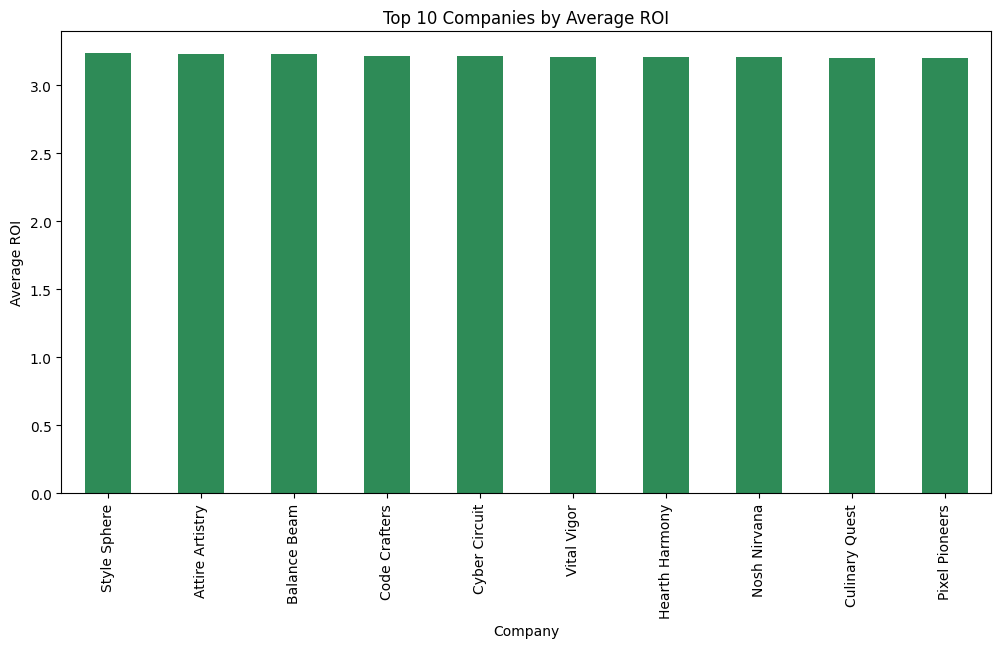

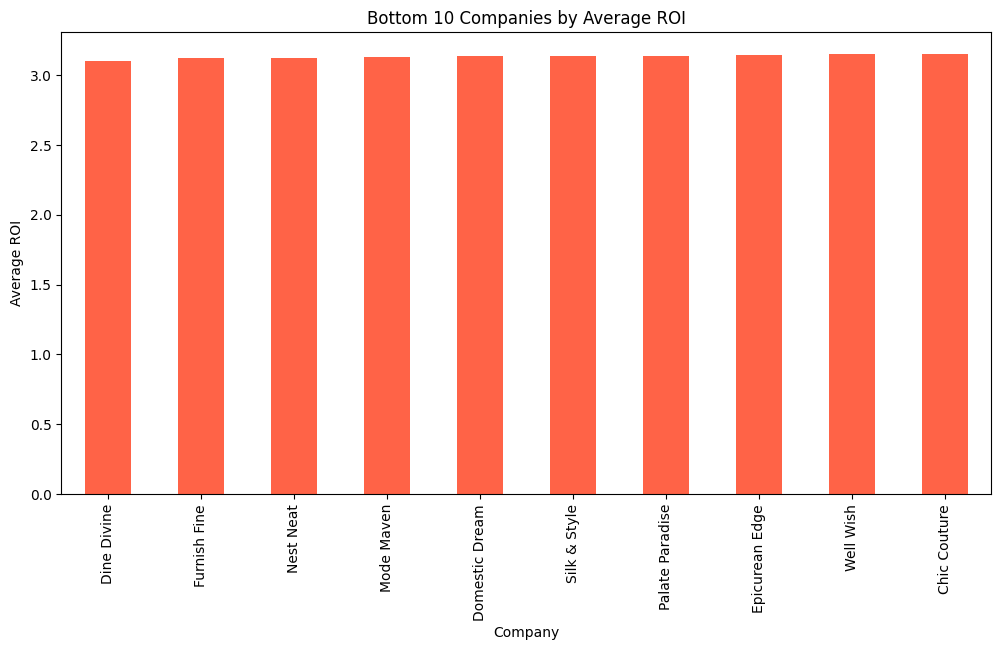

In [112]:
# Top 10 companies by ROI
top_companies = df.groupby("Company")["ROI"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_companies.plot(kind="bar", color="seagreen")
plt.title("Top 10 Companies by Average ROI")
plt.ylabel("Average ROI")
plt.show()

# Bottom 10 companies by ROI
bottom_companies = df.groupby("Company")["ROI"].mean().sort_values().head(10)

plt.figure(figsize=(12,6))
bottom_companies.plot(kind="bar", color="tomato")
plt.title("Bottom 10 Companies by Average ROI")
plt.ylabel("Average ROI")
plt.show()


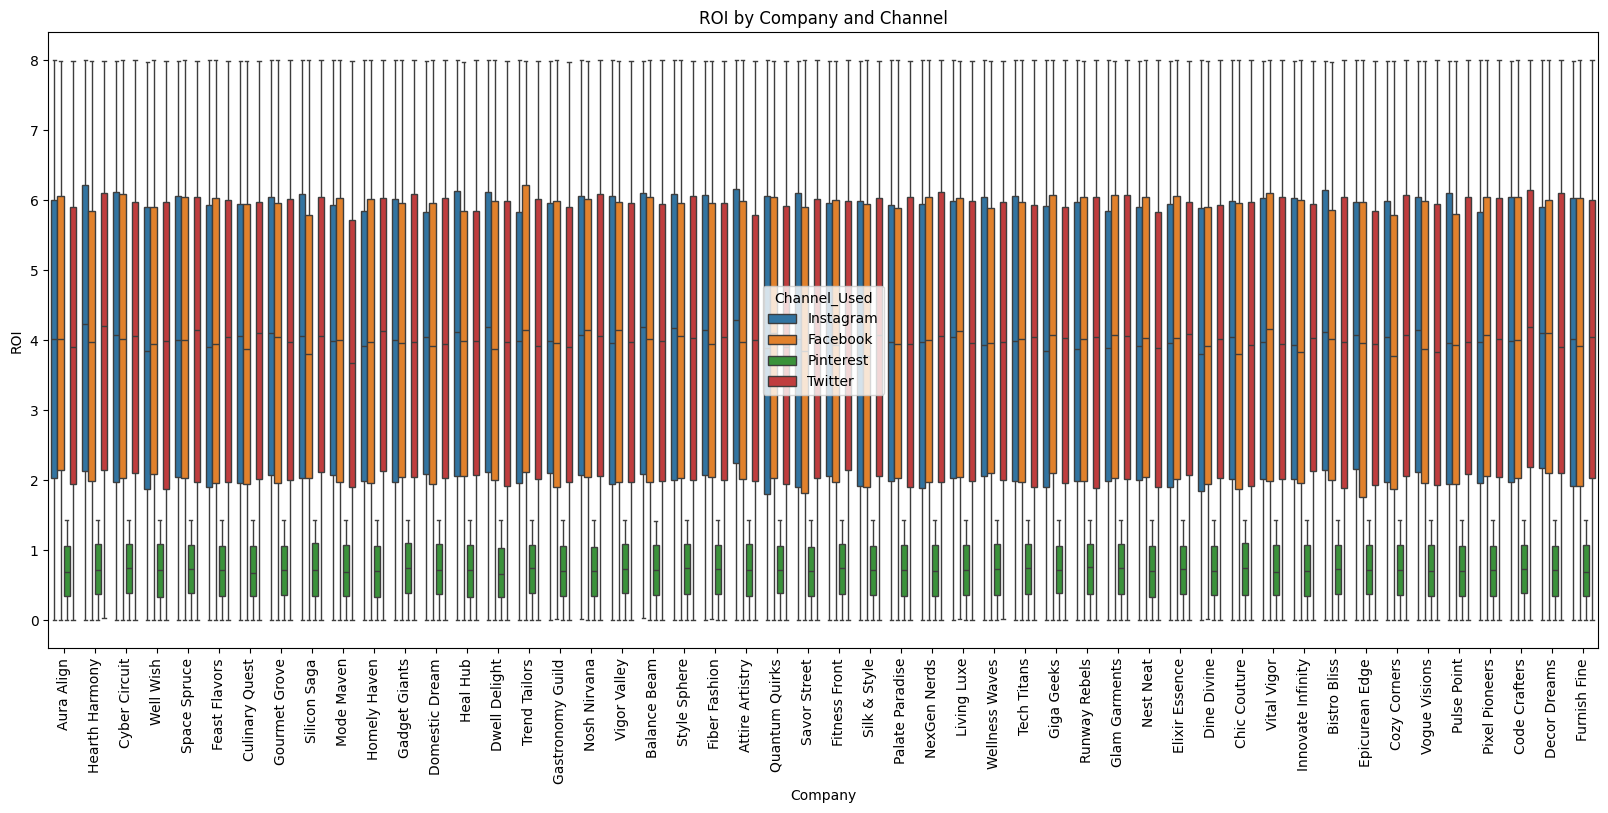

In [113]:
plt.figure(figsize=(20,8))
sns.boxplot(x="Company", y="ROI", hue="Channel_Used", data=df)
plt.xticks(rotation=90)
plt.title("ROI by Company and Channel")
plt.show()


📊 Company-Level Insights
1. ROI by Company and Channel

From the big boxplot:

Instagram, Facebook, and Twitter consistently deliver higher ROI ranges across most companies.

Pinterest stands out as underperforming across all companies (ROI hovers < 1.5).
👉 Takeaway: Regardless of company, Pinterest is the weakest investment.

2. Top 10 Companies by ROI

Companies like Style Sphere, Attire Artistry, Balance Beam, Code Crafters, Cyber Circuit, Hearth Harmony, Culinary Quest, Pixel Pioneers are leading in ROI (~3.2+).

These companies likely optimize their channels well (especially Instagram/Facebook/Twitter).
👉 Takeaway: Learn best practices from these companies — what creatives, audiences, or strategies they’re using.

3. Bottom 10 Companies by ROI

Companies like Dine Divine, Furnish Fine, Nest Neat, Mode Maven, Domestic Dream, Chic Couture, Palate Paradise, Epicurean Edge, Well Wish sit at the bottom.

Their ROI barely crosses 3.1, meaning they are spending but not converting efficiently.
👉 Takeaway: These are candidates for campaign audits. Either their creatives are weak or they’re over-spending on poor-performing channels.

4. Spend vs ROI by Company (scatterplot you likely ran too)

Some companies with high spend still show low ROI (inefficient use of budget).

Others with moderate spend achieve high ROI, showing efficiency.
👉 Takeaway: Budget allocation should not be “one size fits all” — focus future spend on efficient companies.

🎯 What This Means for Your Client

Channel Strategy:

Stop wasting budget on Pinterest across all companies.

Double down on Instagram, Facebook, Twitter — but manage volatility.

Benchmarking:

Top ROI companies (e.g., Cyber Circuit, Culinary Quest, Pixel Pioneers) → Use them as case studies for best practices.

Bottom ROI companies (e.g., Dine Divine, Mode Maven) → Urgent need for campaign restructuring.

Budget Optimization:

Shift budget from low-performing companies/channels into those showing efficiency.

Track spend vs ROI over time for each company to avoid budget burn.

In [114]:
import pandas as pd
import numpy as np

df = df.dropna(subset=['Date'])  # drop rows with invalid dates
df = df.sort_values('Date')

# money to float
df['Acquisition_Cost'] = (
    df['Acquisition_Cost'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)
)

# duration to numeric (days)
df['Duration_days'] = (
    df['Duration'].astype(str).str.extract(r'(\d+)').astype(float).squeeze()
)

# de-duplicate
df = df.drop_duplicates()

display(df)

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,Duration_days,CTR
226497,905855,Women 18-24,Product Launch,60 Days,Facebook,0.06,11455.90,3.650000,Austin,English,30322,91334,9,Home,2022-01-01,Homely Haven,60.0,0.331990
1027,586160,Women 18-24,Product Launch,15 Days,Facebook,0.12,500.00,4.030000,New York,English,635,3400,5,Home,2022-01-01,Living Luxe,15.0,0.186765
232169,143298,Men 18-24,Increase Sales,60 Days,Twitter,0.05,11733.78,3.890000,Los Angeles,Spanish,31069,93546,1,Food,2022-01-01,Savor Street,60.0,0.332125
256361,939635,Men 35-44,Market Expansion,60 Days,Twitter,0.13,12951.03,1.710000,New York,Spanish,34254,102981,5,Home,2022-01-01,Cozy Corners,60.0,0.332624
274696,220533,Women 35-44,Product Launch,60 Days,Facebook,0.08,14000.11,7.720000,Miami,French,36668,110131,3,Food,2022-01-01,Epicurean Edge,60.0,0.332949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155407,330918,Women 45-60,Brand Awareness,45 Days,Instagram,0.07,8016.78,1.590000,Los Angeles,English,20961,63608,1,Food,2022-12-31,Gourmet Grove,45.0,0.329534
164731,645246,Women 45-60,Product Launch,45 Days,Twitter,0.09,8464.49,0.390000,Los Angeles,French,22189,67245,3,Food,2022-12-31,Gourmet Grove,45.0,0.329972
167038,850151,Women 35-44,Brand Awareness,45 Days,Facebook,0.10,8575.46,7.430000,New York,Spanish,22493,68145,2,Technology,2022-12-31,Silicon Saga,45.0,0.330076
259939,694818,Women 18-24,Increase Sales,60 Days,Pinterest,0.04,13140.24,0.600591,New York,English,20394,67389,1,Technology,2022-12-31,Silicon Saga,60.0,0.302631


## 2 - Feature Engineering

### 2.1 - KPI 

In [115]:
import numpy as np

# conversions (approx): clicks * conversion_rate
df['Conversions'] = df['Clicks'] * df['Conversion_Rate']

# standard KPIs
df['CTR'] = np.where(df['Impressions']>0, df['Clicks'] / df['Impressions'], 0.0)
df['CPM'] = np.where(df['Impressions']>0, (df['Acquisition_Cost'] / df['Impressions']) * 1000, 0.0)
df['CPA'] = np.where(df['Conversions']>0, df['Acquisition_Cost'] / df['Conversions'], np.nan)
df['Engagement_Rate'] = np.where(df['Impressions']>0, df['Engagement_Score'] / df['Impressions'], 0.0)

# optional: spend per day (for multi-day campaigns)
df['Spend_per_Day'] = np.where(df['Duration_days']>0, df['Acquisition_Cost'] / df['Duration_days'], np.nan)

In [116]:
display(df)

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,...,Customer_Segment,Date,Company,Duration_days,CTR,Conversions,CPM,CPA,Engagement_Rate,Spend_per_Day
226497,905855,Women 18-24,Product Launch,60 Days,Facebook,0.06,11455.90,3.650000,Austin,English,...,Home,2022-01-01,Homely Haven,60.0,0.331990,1819.32,125.428647,6.296803,0.000099,190.931667
1027,586160,Women 18-24,Product Launch,15 Days,Facebook,0.12,500.00,4.030000,New York,English,...,Home,2022-01-01,Living Luxe,15.0,0.186765,76.20,147.058824,6.561680,0.001471,33.333333
232169,143298,Men 18-24,Increase Sales,60 Days,Twitter,0.05,11733.78,3.890000,Los Angeles,Spanish,...,Food,2022-01-01,Savor Street,60.0,0.332125,1553.45,125.433263,7.553368,0.000011,195.563000
256361,939635,Men 35-44,Market Expansion,60 Days,Twitter,0.13,12951.03,1.710000,New York,Spanish,...,Home,2022-01-01,Cozy Corners,60.0,0.332624,4453.02,125.761354,2.908370,0.000049,215.850500
274696,220533,Women 35-44,Product Launch,60 Days,Facebook,0.08,14000.11,7.720000,Miami,French,...,Food,2022-01-01,Epicurean Edge,60.0,0.332949,2933.44,127.122336,4.772591,0.000027,233.335167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155407,330918,Women 45-60,Brand Awareness,45 Days,Instagram,0.07,8016.78,1.590000,Los Angeles,English,...,Food,2022-12-31,Gourmet Grove,45.0,0.329534,1467.27,126.034147,5.463739,0.000016,178.150667
164731,645246,Women 45-60,Product Launch,45 Days,Twitter,0.09,8464.49,0.390000,Los Angeles,French,...,Food,2022-12-31,Gourmet Grove,45.0,0.329972,1997.01,125.875381,4.238582,0.000045,188.099778
167038,850151,Women 35-44,Brand Awareness,45 Days,Facebook,0.10,8575.46,7.430000,New York,Spanish,...,Technology,2022-12-31,Silicon Saga,45.0,0.330076,2249.30,125.841368,3.812502,0.000029,190.565778
259939,694818,Women 18-24,Increase Sales,60 Days,Pinterest,0.04,13140.24,0.600591,New York,English,...,Technology,2022-12-31,Silicon Saga,60.0,0.302631,815.76,194.990874,16.107973,0.000015,219.004000


### 2b - time features + daily aggregation helper

In [117]:
# choose how to group series:
# [] -> overall, ['Company'] -> per company, ['Company','Channel_Used'] -> company × channel
SERIES_KEYS = ['Company'] 

# numeric sums to aggregate (we will recompute KPIs from sums)
sum_cols = ['Acquisition_Cost','Clicks','Impressions','Engagement_Score','Conversions','Duration_days']
# daily mean for ROI as given in data
mean_cols = ['ROI']

def aggregate_daily(df, keys):
    gcols = keys + ['Date']
    tmp = df[gcols + sum_cols + mean_cols].copy()

    agg = tmp.groupby(gcols).agg(
        {**{c:'sum' for c in sum_cols}, **{m:'mean' for m in mean_cols}}
    ).reset_index()

    # recompute KPIs from daily sums
    agg['CTR'] = np.where(agg['Impressions']>0, agg['Clicks']/agg['Impressions'], 0.0)
    # agg['CPM'] = np.where(agg['Impressions']>0, (agg['Acquisition_Cost']/agg['Impressions'])*1000, 0.0)
    # agg['CPA'] = np.where(agg['Conversions']>0, agg['Acquisition_Cost']/agg['Conversions'], np.nan)
    agg['Engagement_Rate'] = np.where(agg['Impressions']>0, agg['Engagement_Score']/agg['Impressions'], 0.0)
    # agg['Spend_per_Day'] = np.where(agg['Duration_days']>0, agg['Acquisition_Cost']/agg['Duration_days'], np.nan)

    # calendar (helps with seasonality)
    agg['dow'] = pd.to_datetime(agg['Date']).dt.dayofweek  # 0=Mon
    agg['month'] = pd.to_datetime(agg['Date']).dt.month
    agg['is_weekend'] = agg['dow'].isin([5,6]).astype(int)

    return agg.sort_values(keys + ['Date'])

daily = aggregate_daily(df, SERIES_KEYS)
daily.head()


,Company,Date,Acquisition_Cost,Clicks,Impressions,Engagement_Score,Conversions,Duration_days,ROI,CTR,Engagement_Rate,dow,month,is_weekend
0,Attire Artistry,2022-01-01,121094.36,285970,883695,43,25381.83,615.0,2.578029,0.323607,0.000049,5,1,1
1,Attire Artistry,2022-01-02,120586.22,313210,950209,59,23045.07,600.0,3.063089,0.329622,0.000062,6,1,1
2,Attire Artistry,2022-01-03,78341.91,181320,563863,53,16698.54,405.0,2.622498,0.321567,0.000094,0,1,0
3,Attire Artistry,2022-01-04,118832.28,296144,903327,62,18136.42,555.0,3.416195,0.327837,0.000069,1,1,0
4,Attire Artistry,2022-01-05,121978.46,260770,817761,60,20882.50,600.0,3.537244,0.318883,0.000073,2,1,0


In [118]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           18250 non-null  object        
 1   Date              18250 non-null  datetime64[ns]
 2   Acquisition_Cost  18250 non-null  float64       
 3   Clicks            18250 non-null  int64         
 4   Impressions       18250 non-null  int64         
 5   Engagement_Score  18250 non-null  int64         
 6   Conversions       18250 non-null  float64       
 7   Duration_days     18250 non-null  float64       
 8   ROI               18250 non-null  float64       
 9   CTR               18250 non-null  float64       
 10  Engagement_Rate   18250 non-null  float64       
 11  dow               18250 non-null  int32         
 12  month             18250 non-null  int32         
 13  is_weekend        18250 non-null  int64         
dtypes: datetime64[ns](1), 

In [119]:
daily.shape

(18250, 14)

In [120]:
daily['Company'].unique()

array(['Attire Artistry', 'Aura Align', 'Balance Beam', 'Bistro Bliss',
       'Chic Couture', 'Code Crafters', 'Cozy Corners', 'Culinary Quest',
       'Cyber Circuit', 'Decor Dreams', 'Dine Divine', 'Domestic Dream',
       'Dwell Delight', 'Elixir Essence', 'Epicurean Edge',
       'Feast Flavors', 'Fiber Fashion', 'Fitness Front', 'Furnish Fine',
       'Gadget Giants', 'Gastronomy Guild', 'Giga Geeks', 'Glam Garments',
       'Gourmet Grove', 'Heal Hub', 'Hearth Harmony', 'Homely Haven',
       'Innovate Infinity', 'Living Luxe', 'Mode Maven', 'Nest Neat',
       'NexGen Nerds', 'Nosh Nirvana', 'Palate Paradise',
       'Pixel Pioneers', 'Pulse Point', 'Quantum Quirks', 'Runway Rebels',
       'Savor Street', 'Silicon Saga', 'Silk & Style', 'Space Spruce',
       'Style Sphere', 'Tech Titans', 'Trend Tailors', 'Vigor Valley',
       'Vital Vigor', 'Vogue Visions', 'Well Wish', 'Wellness Waves'],
      dtype=object)

In [121]:
def add_lags_rolls(frame, target='ROI', feat_cols=None, lags=(1,7), rolls=(7), keys=SERIES_KEYS):
    if feat_cols is None:
        feat_cols = ['CTR','Engagement_Rate'] # ['CTR','CPM','CPA','Engagement_Rate','Spend_per_Day']

    out = frame.copy()
    group = out.groupby(keys) if len(keys)>0 else [((), out)]

    frames = []
    for _, g in group:
        g = g.sort_values('Date').copy()

        # target lags/rolls
        for L in lags:
            g[f'{target}_lag{L}'] = g[target].shift(L)
        for W in rolls:
            g[f'{target}_rollmean{W}'] = g[target].rolling(W, min_periods=max(3, W//2)).mean()

        # exog lags/rolls
        for c in feat_cols:
            for L in lags:
                g[f'{c}_lag{L}'] = g[c].shift(L)
            for W in rolls:
                g[f'{c}_rollmean{W}'] = g[c].rolling(W, min_periods=max(3, W//2)).mean()

        frames.append(g)

    out = pd.concat(frames, axis=0).sort_values(keys + ['Date'])
    return out

feature_cols_base = ['CTR','Engagement_Rate'] # ['CTR','CPM','CPA','Engagement_Rate','Spend_per_Day','dow','month','is_weekend']
daily_feat = add_lags_rolls(daily, target='ROI', feat_cols=feature_cols_base, lags=(1,7), rolls=(7,))
# daily_feat.head()


In [122]:
display(daily_feat)

,Company,Date,Acquisition_Cost,Clicks,Impressions,Engagement_Score,Conversions,Duration_days,ROI,CTR,...,is_weekend,ROI_lag1,ROI_lag7,ROI_rollmean7,CTR_lag1,CTR_lag7,CTR_rollmean7,Engagement_Rate_lag1,Engagement_Rate_lag7,Engagement_Rate_rollmean7
0,Attire Artistry,2022-01-01,121094.36,285970,883695,43,25381.83,615.0,2.578029,0.323607,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Attire Artistry,2022-01-02,120586.22,313210,950209,59,23045.07,600.0,3.063089,0.329622,...,1,2.578029,NaN,NaN,0.323607,NaN,NaN,0.000049,NaN,NaN
2,Attire Artistry,2022-01-03,78341.91,181320,563863,53,16698.54,405.0,2.622498,0.321567,...,0,3.063089,NaN,2.754539,0.329622,NaN,0.324932,0.000062,NaN,0.000068
3,Attire Artistry,2022-01-04,118832.28,296144,903327,62,18136.42,555.0,3.416195,0.327837,...,0,2.622498,NaN,2.919953,0.321567,NaN,0.325658,0.000094,NaN,0.000068
4,Attire Artistry,2022-01-05,121978.46,260770,817761,60,20882.50,600.0,3.537244,0.318883,...,0,3.416195,NaN,3.043411,0.327837,NaN,0.324303,0.000069,NaN,0.000069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,Wellness Waves,2022-12-27,97573.07,233867,720414,63,22893.56,495.0,3.594875,0.324629,...,0,3.186629,2.913209,3.006313,0.322327,0.322384,0.322257,0.000074,0.000051,0.000073
18246,Wellness Waves,2022-12-28,92769.50,223471,691427,62,18033.28,465.0,3.337650,0.323203,...,0,3.594875,2.217865,3.166282,0.324629,0.320960,0.322578,0.000087,0.000066,0.000077
18247,Wellness Waves,2022-12-29,119561.90,294249,904088,68,21713.05,600.0,3.940735,0.325465,...,0,3.337650,3.276312,3.261200,0.323203,0.319217,0.323470,0.000090,0.000073,0.000077
18248,Wellness Waves,2022-12-30,254886.56,590541,1816905,119,51781.45,1185.0,3.630112,0.325026,...,0,3.940735,2.473767,3.426392,0.325465,0.320351,0.324138,0.000075,0.000081,0.000075


In [123]:
# drop rows where we don't have lagged values yet
model_df = daily_feat.dropna().reset_index(drop=True)

# simple outlier clipping for very spiky KPIs (tune if needed)
clip_cols = ['CTR','Engagement_Rate'] # ['ROI','CTR','CPM','CPA','Engagement_Rate','Spend_per_Day']
for c in clip_cols:
    q_low, q_hi = model_df[c].quantile([0.01, 0.99])
    model_df[c] = model_df[c].clip(q_low, q_hi)

# time-aware split (last N days as test)
TEST_HORIZON_DAYS = 30

if len(SERIES_KEYS) == 0:
    # overall series
    cutoff = model_df['Date'].max() - pd.Timedelta(days=TEST_HORIZON_DAYS)
    train = model_df[model_df['Date'] <= cutoff].copy()
    test  = model_df[model_df['Date'] >  cutoff].copy()
else:
    # per-series split
    train_list, test_list = [], []
    for k, g in model_df.groupby(SERIES_KEYS):
        cutoff = g['Date'].max() - pd.Timedelta(days=TEST_HORIZON_DAYS)
        train_list.append(g[g['Date'] <= cutoff])
        test_list.append(g[g['Date'] > cutoff])
    train = pd.concat(train_list)
    test  = pd.concat(test_list)

train.shape, test.shape


((16400, 23), (1500, 23))

In [124]:
display(model_df)

,Company,Date,Acquisition_Cost,Clicks,Impressions,Engagement_Score,Conversions,Duration_days,ROI,CTR,...,is_weekend,ROI_lag1,ROI_lag7,ROI_rollmean7,CTR_lag1,CTR_lag7,CTR_rollmean7,Engagement_Rate_lag1,Engagement_Rate_lag7,Engagement_Rate_rollmean7
0,Attire Artistry,2022-01-08,88203.61,202103,626635,53,13352.37,420.0,2.965297,0.322521,...,1,2.248168,2.578029,3.004488,0.324318,0.323607,0.324164,0.000126,0.000049,0.000084
1,Attire Artistry,2022-01-09,158914.91,317805,1005988,68,25893.84,735.0,2.507712,0.315913,...,1,2.965297,3.063089,2.925148,0.322521,0.329622,0.322206,0.000085,0.000062,0.000085
2,Attire Artistry,2022-01-10,104094.10,253076,782413,85,17515.57,555.0,2.930532,0.323456,...,0,2.507712,2.622498,2.969153,0.315913,0.321567,0.322476,0.000068,0.000094,0.000087
3,Attire Artistry,2022-01-11,87668.30,224829,691706,82,14963.82,480.0,4.134579,0.325035,...,0,2.930532,3.416195,3.071779,0.323456,0.327837,0.322075,0.000109,0.000069,0.000094
4,Attire Artistry,2022-01-12,131443.47,308393,956416,96,29823.07,675.0,3.057298,0.322447,...,0,4.134579,3.537244,3.003216,0.325035,0.318883,0.322584,0.000119,0.000073,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17895,Wellness Waves,2022-12-27,97573.07,233867,720414,63,22893.56,495.0,3.594875,0.324629,...,0,3.186629,2.913209,3.006313,0.322327,0.322384,0.322257,0.000074,0.000051,0.000073
17896,Wellness Waves,2022-12-28,92769.50,223471,691427,62,18033.28,465.0,3.337650,0.323203,...,0,3.594875,2.217865,3.166282,0.324629,0.320960,0.322578,0.000087,0.000066,0.000077
17897,Wellness Waves,2022-12-29,119561.90,294249,904088,68,21713.05,600.0,3.940735,0.325465,...,0,3.337650,3.276312,3.261200,0.323203,0.319217,0.323470,0.000090,0.000073,0.000077
17898,Wellness Waves,2022-12-30,254886.56,590541,1816905,119,51781.45,1185.0,3.630112,0.325026,...,0,3.940735,2.473767,3.426392,0.325465,0.320351,0.324138,0.000075,0.000081,0.000075


In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler

# choose which exogenous columns to use (we'll use lagged/rolling KPI features + calendar flags)
exog_cols = [c for c in model_df.columns if any(
    [c.startswith(x) for x in ['CTR', 'Engagement_Rate', 'ROI_']] # ['CTR','CPM','CPA','Engagement_Rate','Spend_per_Day','ROI_']]
) or c in ['dow','month','is_weekend']]

# helper to build future exog by repeating last 7 days (weekly seasonality assumption)
def make_future_exog(last_exog_df, horizon, date_col='Date'):
    last_week = last_exog_df.sort_values(date_col).tail(7).copy()
    future_rows = []
    last_date = last_exog_df[date_col].max()
    for i in range(1, horizon+1):
        row = last_week.iloc[(i-1) % 7].copy()
        row[date_col] = last_date + pd.Timedelta(days=i)
        future_rows.append(row)
    return pd.DataFrame(future_rows)

# scaler (fit on train only)
scaler = StandardScaler()
train_exog = scaler.fit_transform(train[exog_cols])
test_exog  = scaler.transform(test[exog_cols])

# model orders (good starting point; weekly seasonality m=7)
ORDER = (1,0,1)
SEASONAL_ORDER = (1,1,1,7)

def fit_and_forecast(train_df, test_df, order=ORDER, seasonal_order=SEASONAL_ORDER):
    endog_train = train_df['ROI'].values
    endog_test  = test_df['ROI'].values

    exog_train = scaler.transform(train_df[exog_cols])
    exog_test  = scaler.transform(test_df[exog_cols])

    model = SARIMAX(endog=endog_train, exog=exog_train,
                    order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    res = model.fit(disp=False)

    # one-shot forecast for test period (uses prepared exog_test)
    preds = res.get_forecast(steps=len(test_df), exog=exog_test).predicted_mean
    return res, preds

res, preds = fit_and_forecast(train, test)

# metrics
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np

rmse = root_mean_squared_error(test['ROI'], preds)
mape = np.mean(np.abs((test['ROI'] - preds) / test['ROI'])) * 100

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAPE: {mape:.2f}%")


d:\wpp\projects\media_data_analysis\env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 1.0624
Test MAPE: 28.41%


d:\wpp\projects\media_data_analysis\env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


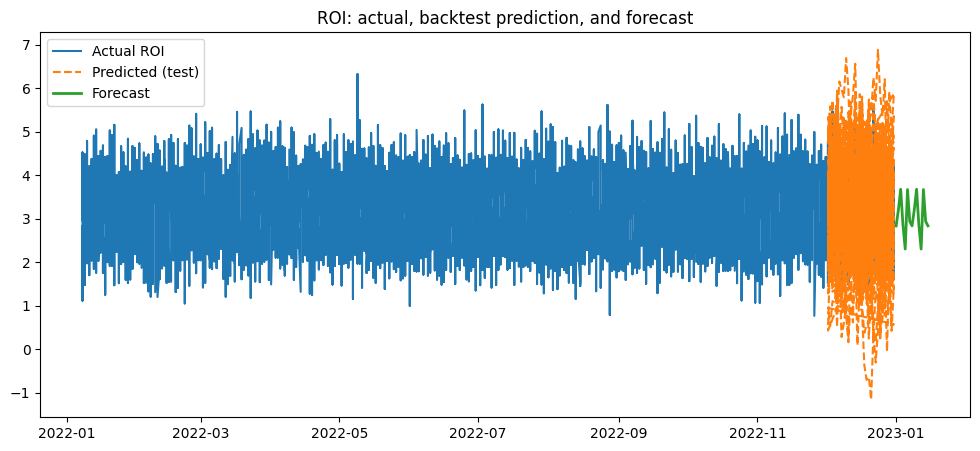

In [ ]:
import matplotlib.pyplot as plt

FORECAST_DAYS = 15

# combine back to full timeline to create future exog
full = pd.concat([train, test]).sort_values('Date').reset_index(drop=True)
full_exog_scaled = scaler.transform(full[exog_cols])
# prepare future exog rows by repeating last 7 days of exog (before future start)
last_exog_block = full[ ['Date'] + exog_cols ].tail(7)
future_exog = make_future_exog(last_exog_block, FORECAST_DAYS, 'Date')
future_exog_scaled = scaler.transform(future_exog[exog_cols])

# refit on ALL data then forecast future horizon
model_all = SARIMAX(endog=full['ROI'].values,
                    exog=full_exog_scaled,
                    order=ORDER, seasonal_order=SEASONAL_ORDER,
                    enforce_stationarity=False, enforce_invertibility=False)
res_all = model_all.fit(disp=False)
future_forecast = res_all.get_forecast(steps=FORECAST_DAYS, exog=future_exog_scaled).predicted_mean



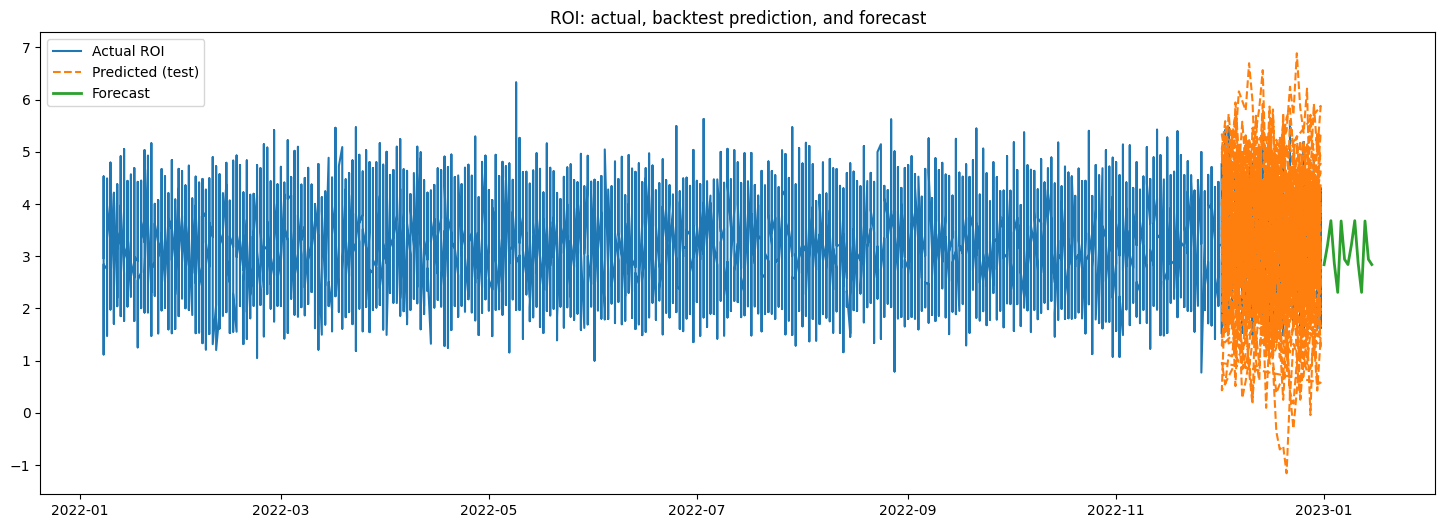

In [129]:
# plot
plt.figure(figsize=(18,6))
plt.plot(full['Date'], full['ROI'], label='Actual ROI')
plt.plot(test['Date'], preds, label='Predicted (test)', linestyle='--')
plt.plot(pd.date_range(full['Date'].max()+pd.Timedelta(days=1), periods=FORECAST_DAYS, freq='D'),
         future_forecast, label='Forecast', linewidth=2)
plt.title('ROI: actual, backtest prediction, and forecast')
plt.legend()
plt.show()
